## 1. Importing Libraries

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

## 2. Loading Dataset

In [2]:
yelp=pd.read_csv('yelp.csv')

In [51]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [47]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
length         10000 non-null int64
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [5]:
yelp.shape

(10000, 10)

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


We create a new column called "text length" which contains the number of words in the text column.

In [48]:
yelp['length']=yelp['text'].apply(lambda x: len(x))

In [50]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


## 3. Exploratory Data Analysis

We use matplotlib library or FacetGrid from the seaborn library to create a grid of 5 histograms showing the text length based off of the star ratings.

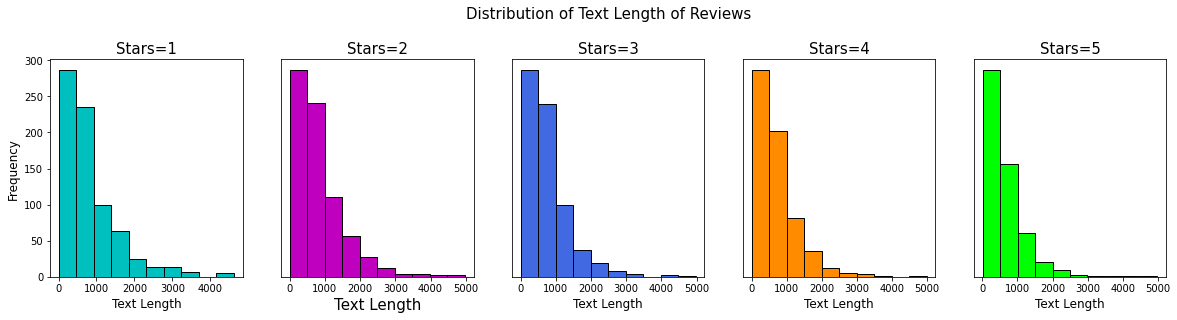

In [70]:
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.hist(x='length', data=yelp[yelp['stars']==1],bins=10,edgecolor='black', color='c')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Stars=1', fontsize=15)

plt.subplot(1,5,2)
plt.hist(x='length', data=yelp[yelp['stars']==2],bins=10,edgecolor='black', color='m')
plt.xlabel('Text Length', fontsize=15)
plt.yticks([])
plt.title('Stars=2', fontsize=15)

plt.subplot(1,5,3)
plt.hist(x='length', data=yelp[yelp['stars']==3],bins=10,edgecolor='black', color='royalblue')
plt.xlabel('Text Length', fontsize=12)
plt.yticks([])
plt.title('Distribution of Text Length of Reviews\n\nStars=3', fontsize=15)

plt.subplot(1,5,4)
plt.hist(x='length', data=yelp[yelp['stars']==4],bins=10,edgecolor='black', color='darkorange')
plt.xlabel('Text Length', fontsize=12)
plt.yticks([])
plt.title('Stars=4', fontsize=15)

plt.subplot(1,5,5)
plt.hist(x='length', data=yelp[yelp['stars']==5],bins=10,edgecolor='black', color='lime')
plt.xlabel('Text Length', fontsize=12)
plt.yticks([])
plt.title('Stars=5', fontsize=15)

plt.show()

Now we create a boxplot of text length for each star category.

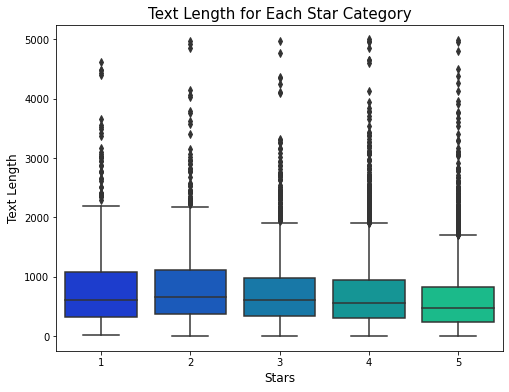

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x='stars', y='length', data=yelp, palette='winter')
plt.ylabel('text length')
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.title('Text Length for Each Star Category', fontsize=15)
plt.show()

We create a countplot of the number of occurrences for each type of star rating.

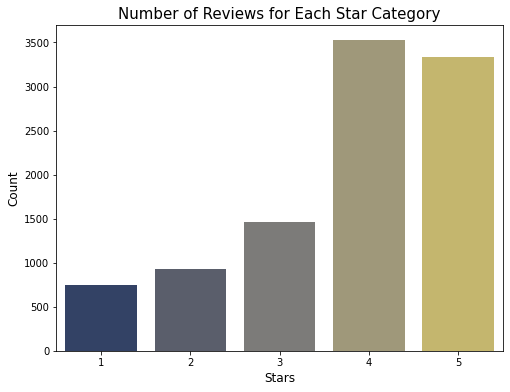

In [78]:
plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=yelp, palette='cividis')
plt.ylabel('text length')
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Reviews for Each Star Category', fontsize=15)
plt.show()

We use groupby to get the mean values of the numerical columns.

In [79]:
yelp.groupby('stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Now we use the corr() method on the groupby dataframe.

In [80]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Now we use seaborn to create a heatmap based off the .corr() dataframe.

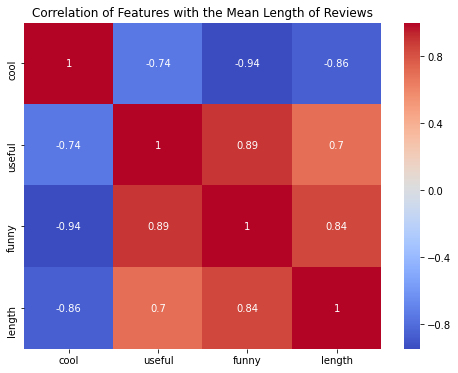

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',annot=True)
plt.title('Correlation of Features with the Mean Length of Reviews', fontsize=12)
plt.show()

## 4. Prediction of Star Rating

To make things a little easier, we only grab reviews that were either 1 star or 5 stars. So we create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [85]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

### 4.1. Text Preprocessing Function

We define a preprocessing function that performs the following operations:

- Converting text to lower case

- Removing numbers from the text corpus

- Removing punctuation from the text corpus

- Removing special characters such as ‘<’, ‘…’ from the text corpus

- Removing english stopwords

- Stemming words to root words

- Removing extra whitespaces from the text corpus

In [90]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x): 
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation 
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces 
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

### 4.2. Splitting the Dataset 

In [91]:
X=yelp_class['text']
y=yelp_class['stars']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 4.3. Creating Data Pipeline

#### 4.3.1. MultinomialNB Classifier without Text Preprocessing 

In [93]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [94]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [95]:
prediction1=pipeline.predict(X_test)

In [96]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.3.2. MultinomialNB Classifier with Text Preprocessing

In [97]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x000001586E158B88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose

In [99]:
prediction2=pipeline.predict(X_test)

In [100]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.3.3. MultinomialNB Classifier with Only Removing Stop Words

In [101]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [102]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [103]:
prediction3=pipeline.predict(X_test)

In [104]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.3.4. Passive Aggressive Classifier without Text Preprocessing

In [105]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [106]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                          

In [107]:
prediction4=pipeline.predict(X_test)

In [108]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           1       0.90      0.83      0.87       228
           5       0.96      0.98      0.97       998

    accuracy                           0.95      1226
   macro avg       0.93      0.91      0.92      1226
weighted avg       0.95      0.95      0.95      1226



#### 4.3.5. Passive Aggressive Classifier with Text Preprocessing

In [109]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [110]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x000001586E158B88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
       

In [111]:
prediction5=pipeline.predict(X_test)

In [112]:
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           1       0.88      0.83      0.85       228
           5       0.96      0.97      0.97       998

    accuracy                           0.95      1226
   macro avg       0.92      0.90      0.91      1226
weighted avg       0.95      0.95      0.95      1226



#### 4.3.6. Passive Aggressive Classifier with Only Removing Stop Words

In [113]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [114]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                          

In [115]:
prediction6=pipeline.predict(X_test)

In [116]:
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83       228
           5       0.95      0.98      0.96       998

    accuracy                           0.94      1226
   macro avg       0.92      0.88      0.90      1226
weighted avg       0.94      0.94      0.94      1226



#### 4.3.7. Random Forest Classifier without Text Preprocessing

In [117]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [118]:
pipeline.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [119]:
prediction7=pipeline.predict(X_test)

In [120]:
print(classification_report(y_test,prediction7))

              precision    recall  f1-score   support

           1       0.77      0.32      0.46       228
           5       0.86      0.98      0.92       998

    accuracy                           0.86      1226
   macro avg       0.82      0.65      0.69      1226
weighted avg       0.85      0.86      0.83      1226



#### 4.3.8. Random Forest  Classifier with Text Preprocessing

In [121]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=final)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [122]:
pipeline.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x000001586E158B88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [123]:
prediction8=pipeline.predict(X_test)

In [124]:
print(classification_report(y_test,prediction8))

              precision    recall  f1-score   support

           1       0.79      0.36      0.49       228
           5       0.87      0.98      0.92       998

    accuracy                           0.86      1226
   macro avg       0.83      0.67      0.70      1226
weighted avg       0.85      0.86      0.84      1226



#### 4.3.9. Random Forest  Classifier with Only Removing Stop Words

In [125]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [126]:
pipeline.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [127]:
prediction9=pipeline.predict(X_test)

In [128]:
print(classification_report(y_test,prediction9))

              precision    recall  f1-score   support

           1       0.82      0.49      0.61       228
           5       0.89      0.97      0.93       998

    accuracy                           0.88      1226
   macro avg       0.86      0.73      0.77      1226
weighted avg       0.88      0.88      0.87      1226



In [129]:
print('MultinomialNB Classifier without text pre-processing', accuracy_score(y_test,prediction1))
print('MultinomialNB Classifier with text pre-processing: ', accuracy_score(y_test,prediction2))
print('MultinomialNB Classifier with only removing stop words', accuracy_score(y_test,prediction3))
print('\n')
print('Passive Aggressive Classifier without text pre-processing: ', accuracy_score(y_test,prediction4))
print('Passive Aggressive Classifier with text pre-processing: ', accuracy_score(y_test,prediction5))
print('Passive Aggressive Classifier with only removing stop words: ', accuracy_score(y_test,prediction6))
print('\n')
print('Random Forest Classifier without text pre-processing: ', accuracy_score(y_test,prediction7))
print('Random Forest Classifier with text pre-processing: ', accuracy_score(y_test,prediction8))
print('Random Forest Classifier with only removing stop words: ', accuracy_score(y_test,prediction9))

MultinomialNB Classifier without text pre-processing 0.8140293637846656
MultinomialNB Classifier with text pre-processing:  0.8140293637846656
MultinomialNB Classifier with only removing stop words 0.8140293637846656


Passive Aggressive Classifier without text pre-processing:  0.9518760195758564
Passive Aggressive Classifier with text pre-processing:  0.9461663947797716
Passive Aggressive Classifier with only removing stop words:  0.9412724306688418


Random Forest Classifier without text pre-processing:  0.8564437194127243
Random Forest Classifier with text pre-processing:  0.8621533442088092
Random Forest Classifier with only removing stop words:  0.8849918433931484


We can see that the Passive Agreesive Classifier is more effective in predicting the number of stars recorded by users as compared with MultinomialNB and Random Forest Classifiers. The highest accuracy score was obtained for the Passive Agreesive Classifier without text preprocessing.

## 5. Conclusion

In this project, the following tasks were preformed:

- We performed exploratory data analysis on the Yelp Reviews Dataset. 

- We built binary classifiers that predict the number of stars recorded by users. We used three different classifiers including Random Forest Classifier, Naive-Bayes Classifier and passive Agressive Classifier and applied them with and without text preprocessing and with only removing the stop words in the Review text.

- Passive Aggressive was the best model for this analysis of the messages. The highest accuracy was 95.18% and it was obtained for the Passive Aggressive model applied on the text without preprocessing.